In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import nltk
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('all')
from nltk.corpus import stopwords,wordnet
from nltk import pos_tag,WordNetLemmatizer
import re
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import heapq
from sklearn.decomposition import PCA

[nltk_data] Downloading package stopwords to C:\Users\Tysyachnyj
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Tysyachnyj
[nltk_data]     V\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Tysyachnyj
[nltk_data]    |     V\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Tysyachnyj
[nltk_data]    |     V\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Tysyachnyj
[nltk_data]    |     V\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nlt

[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\Tysyachnyj
[nltk_data]    |     V\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat to C:\Users\Tysyachnyj
[nltk_data]    |     V\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nps_chat is already up-to-date!
[nltk_data]    | Downloading package omw to C:\Users\Tysyachnyj
[nltk_data]    |     V\AppData\Roaming\nltk_data...
[nltk_data]    |   Package omw is already up-to-date!
[nltk_data]    | Downloading package omw-1.4 to C:\Users\Tysyachnyj
[nltk_data]    |     V\AppData\Roaming\nltk_data...
[nltk_data]    |   Package omw-1.4 is already up-to-date!
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     C:\Users\Tysyachnyj
[nltk_data]    |     V\AppData\Roaming\nltk_data...
[nltk_data]    |   Package opinion_l

[nltk_data]    |   Package universal_treebanks_v20 is already up-to-
[nltk_data]    |       date!
[nltk_data]    | Downloading package vader_lexicon to
[nltk_data]    |     C:\Users\Tysyachnyj
[nltk_data]    |     V\AppData\Roaming\nltk_data...
[nltk_data]    |   Package vader_lexicon is already up-to-date!
[nltk_data]    | Downloading package verbnet to C:\Users\Tysyachnyj
[nltk_data]    |     V\AppData\Roaming\nltk_data...
[nltk_data]    |   Package verbnet is already up-to-date!
[nltk_data]    | Downloading package verbnet3 to C:\Users\Tysyachnyj
[nltk_data]    |     V\AppData\Roaming\nltk_data...
[nltk_data]    |   Package verbnet3 is already up-to-date!
[nltk_data]    | Downloading package webtext to C:\Users\Tysyachnyj
[nltk_data]    |     V\AppData\Roaming\nltk_data...
[nltk_data]    |   Package webtext is already up-to-date!
[nltk_data]    | Downloading package wmt15_eval to C:\Users\Tysyachnyj
[nltk_data]    |     V\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wmt15

<AxesSubplot: xlabel='category', ylabel='count'>

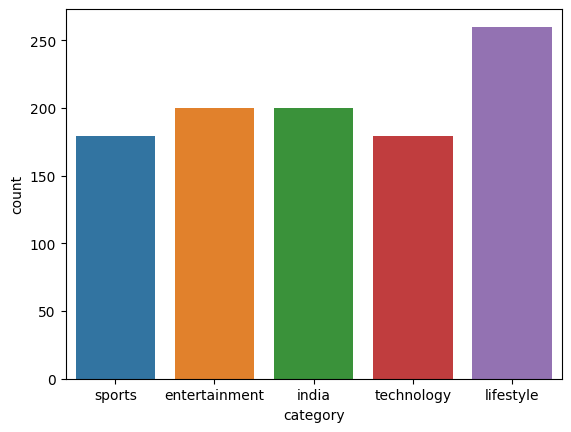

In [18]:
df = pd.read_csv(r"C:\Users\Tysyachnyj V\Downloads\news_data.csv")
df = df.drop(["Unnamed: 0"],axis=1)
df.isnull().sum()

sns.countplot(x = 'category',data = df)

In [19]:
text= []
for i in tqdm(range(len(df))):
    text.append(df["headline"][i])

100%|███████████████████████████████████████████████████████████████████████████| 1018/1018 [00:00<00:00, 85527.74it/s]


In [20]:
cat_map = {}
for i in tqdm(range(len(df))):
    if df["category"][i] not in cat_map:
        cat_map[df["category"][i]] = [i]
    else:
        cat_map[df["category"][i]].append(i)

100%|███████████████████████████████████████████████████████████████████████████| 1018/1018 [00:00<00:00, 74395.86it/s]


In [21]:
def text_preproccesing(text):
    hm = defaultdict(lambda: wordnet.NOUN)
    hm['J'] = wordnet.ADJ
    hm['V'] = wordnet.VERB
    hm['R'] = wordnet.ADV
    for i in tqdm(range(len(text))):
        text[i] = re.sub('[^a-zA-Z]',' ',text[i])
        text[i] = text[i].split()
        text[i] = [word for word in text[i] if not word in set(stopwords.words("english"))]
        lemm = WordNetLemmatizer()
        sent = ""
        for token,tag in pos_tag(text[i]):
            word = lemm.lemmatize(token,hm[tag[0]])
            sent += word+ " "
        sent = sent[:-1]
        text[i] = sent.lower()
    return text


text = text_preproccesing(text)

100%|█████████████████████████████████████████████████████████████████████████████| 1018/1018 [00:03<00:00, 333.59it/s]


In [22]:
def Vectorization(corpus):
    vector = TfidfVectorizer(max_features = 1000)
    X = vector.fit_transform(corpus).toarray()
    return X,vector

X,vector = Vectorization(text)
X.shape

(1018, 1000)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.49it/s]


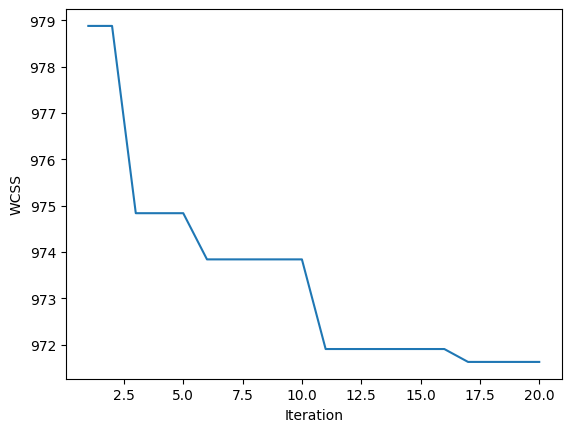

In [30]:
#only execute when required
def elbow_curve(X):
    wcss = []
    for i in tqdm(range(1,21)):
        kmeans = KMeans(n_clusters = 7, init = 'k-means++',max_iter = 300, n_init = i,random_state = 21)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1,21),wcss)
    plt.xlabel("Iteration")
    plt.ylabel("WCSS")

elbow_curve(X)

In [31]:
kmeans = KMeans(n_clusters = 7, init  = "k-means++", max_iter = 300, n_init = 11, random_state = 21)
kmeans.fit(X)
y = kmeans.predict(X)

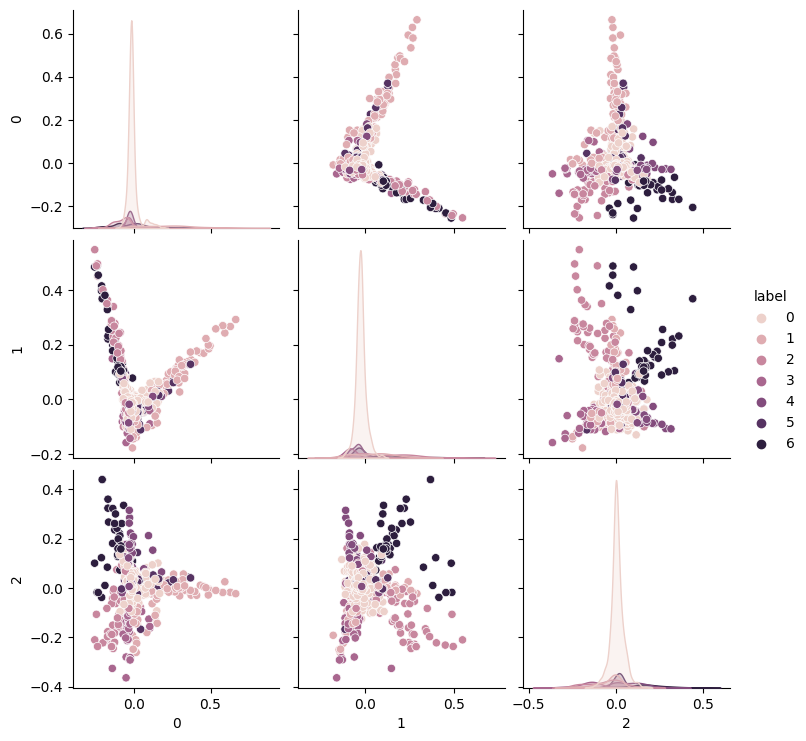

In [32]:
def pcaPlot(X,y):
    pca = PCA(n_components = 3)
    comp = pca.fit_transform(X)
    comp = pd.DataFrame(comp)
    comp['label'] = pd.DataFrame(y)
    sns.pairplot(data = comp,hue = 'label')    
    
pcaPlot(X,y)

In [45]:
def Mapping(kmeans):
    label = kmeans.labels_
    map = {}
    for l in tqdm(range(len(label))):
        if  label[l] not in map:
            map[label[l]] = [l]
        else:
            map[label[l]].append(l)
    return map

Map = Mapping(kmeans)

100%|██████████████████████████████████████████████████████████████████████████████████████| 1018/1018 [00:00<?, ?it/s]


In [54]:
global X
global y
global Map
global cat_map

def getReccomendation(index,df):
    #recc by Model
    prediction = y[index]
    vector_arr= []
    for i in Map[prediction]:
        if i!= index:
            vector_arr.append(X[i])
    vector_arr = np.array(vector_arr)
    sim_array = list(cosine_similarity([X[index]],vector_arr)[0])
    
    #general recc. from category
    cat = df["category"][index]
    new_vect_arr =[]
    for i in cat_map[cat]:
        if i!= index:
            new_vect_arr.append(X[i])
    new_vect_arr = np.array(new_vect_arr)
    cat_sim = list(cosine_similarity([X[index]],new_vect_arr)[0])
    K=15
    gen_rec= []
    heap =[]
    cat_sim.extend(sim_array)
    print(cat_sim)
    new_arr = list(set(cat_sim))
    for i in range(0,len(new_arr)):
        heapq.heappush(heap,(new_arr[i],i))
        if len(heap)>K:
            heapq.heappop(heap)
    score=[]
    while(len(heap)):
        t = heapq.heappop(heap)
        score.append(t[0])
        gen_rec.append(t[1])
    return gen_rec,score


def reccomendations(index, df):
    t,score = getReccomendation(index, df)
    t,score = t[::-1],score[::-1]
    X = df.iloc[:,:].values
    arr =[]
    for i in t:
        arr.append(X[i][:])
    arr = pd.DataFrame(arr)
    arr['score'] =score
    return arr
        
rec_df = reccomendations(4,df)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.16478449417950952, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19954150296328987, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15813731646270937, 0.0, 0.0, 0.34685436194853647, 0.0, 0.5243498961086609, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13102167649988167, 0.0, 0.132120762084344, 0.0, 0.0, 0.31683966659171914, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11690599655918901, 0.3130514737694151, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15824522257704318, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14839276888904107, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.23620154632446935, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20268928170868342, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21379620080100772, 0.16078257845408508, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10901269356761335, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [43]:
rec_df

,0,1,2,3,score
0,india,"June 6, 2020 9:16:50 am","Karnataka BJP abuzz with activity ahead of RS,...",https://indianexpress.com/article/india/karnat...,0.524350
1,entertainment,"June 2, 2020 5:10:00 pm","Streaming in June 2020: Gulabo Sitabo, Choked,...",https://indianexpress.com/article/entertainmen...,0.346854
2,technology,8 June 2020,"Oppo A12 With Dual Rear Cameras, Waterdrop-Sty...",https://gadgets.ndtv.com/mobiles/news/oppo-a12...,0.316840
3,entertainment,"June 3, 2020 9:59:04 pm",Miya George gets engaged to Ashwin Philip,https://indianexpress.com/article/entertainmen...,0.316289
4,lifestyle,"May 30, 2020 3:00:16 pm",Delhi govt releases video on home isolation pr...,https://indianexpress.com/article/lifestyle/he...,0.313051
5,technology,4 June 2020,"Facebook, Instagram Unblock Hashtag #Sikh Afte...",https://gadgets.ndtv.com/social-networking/new...,0.236202
6,india,"June 7, 2020 10:38:43 pm","India coronavirus updates, 07 June: Coronaviru...",https://indianexpress.com/article/india/india-...,0.222970
7,technology,3 June 2020,"Facebook, Saregama Sign Global Deal to Add Its...",https://gadgets.ndtv.com/social-networking/new...,0.213796
8,lifestyle,"May 27, 2020 10:30:52 pm",Try these DIY egg yolk hair masks to keep your...,https://indianexpress.com/article/lifestyle/li...,0.207138
9,entertainment,"June 7, 2020 8:25:03 am",Jon Favreau confirms The Mandalorian Season 2 ...,https://indianexpress.com/article/entertainmen...,0.202689
